In [237]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

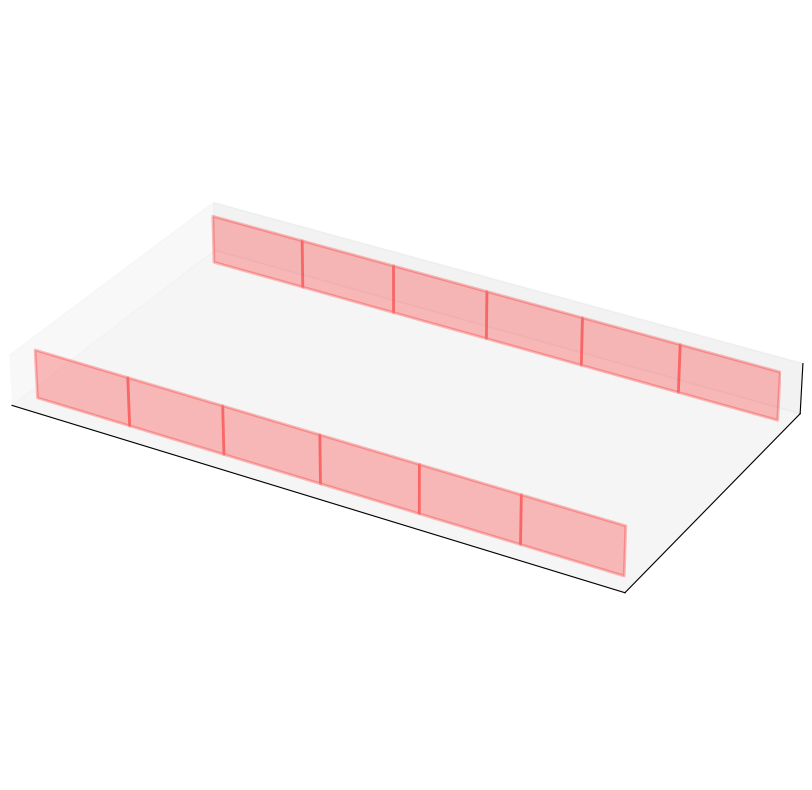

In [338]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

d_model = 8
d_hidden = 2*d_model
B = 48
L = 6

L_by_hidden_ax = 0
B_ax = 1
d_model_ax = 2

def make_face(ax, vals1, vals2, depth, ax1, ax2, color='b', alpha=0.25):
    ax3 = 3 - ax1 - ax2
    val1, val2 = np.meshgrid(vals1, vals2)
    val3 = np.full_like(val1, depth)
    arg = np.array([val1, val2, val3])[[ax1, ax2, ax3]]
    face = ax.plot_surface(*arg, color=color, alpha=alpha, linewidth=2, edgecolor=color)
    return face

phase = 'bwd'
phase_l = 4.5
residual_activations = []
hidden_activations = []
weights1 = []
weights2 = []
for l in range(L+1):
    residual_activations.append(make_face(ax, (0, d_model), (0, B), l*d_hidden, d_model_ax, B_ax, color='g', alpha=0.0))
    if l == L:
        break
    hidden_activations.append(make_face(ax, (l*d_hidden, (l+1)*d_hidden), (0, B), 0, L_by_hidden_ax, B_ax, color='g', alpha=0.0))
    weights1.append(make_face(ax, (l*d_hidden, (l+1)*d_hidden), (0, d_model), 0, L_by_hidden_ax, d_model_ax))
    weights2.append(make_face(ax, (l*d_hidden, (l+1)*d_hidden), (0, d_model), B, L_by_hidden_ax, d_model_ax))

width = L*d_hidden
ax.set_xlim3d(0, width)
ax.set_aspect('equal')
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

def update_gen():
    yield
    yield
    for l in range(L):
        residual_activations[l].set_alpha(0.25)
        residual_activations[l].set_color('g')
        yield
        hidden_activations[l].set_alpha(0.25)
        hidden_activations[l].set_color('g')
        yield
    residual_activations[L].set_alpha(0.25)
    residual_activations[L].set_color('g')
    yield
    residual_activations[L].set_color('r')
    yield
    for l in range(L - 1, -1, -1):
        hidden_activations[l].set_color('r')
        yield
        weights2[l].set_color('r')
        residual_activations[l+1].set_alpha(0.0)
        residual_activations[l+1].set_color('r')
        yield
        if l == 0:
            residual_activations[l].set_alpha(0.0)
        residual_activations[l].set_color('r')
        yield
        weights1[l].set_color('r')
        hidden_activations[l].set_alpha(0.0)
        hidden_activations[l].set_color('r')
        yield
    yield
    yield
update_gen = update_gen()
def update(frame):
    return next(update_gen)

ani = FuncAnimation(fig, update, frames=range(6*L+4))
ani.save('batch.mp4', fps=8, extra_args=['-vcodec', 'libx264'])
